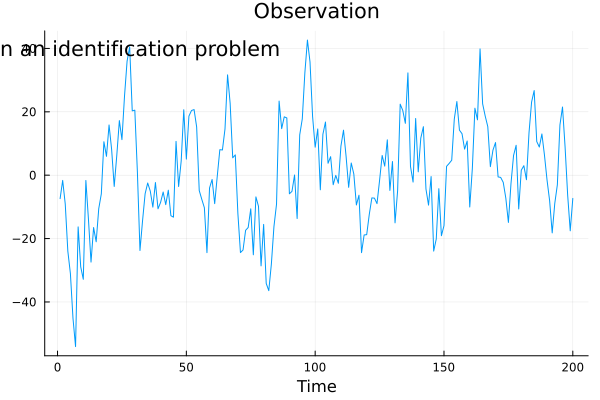

In [12]:
using DSP
using Plots

# test
N = 200
x = randn(N)
htest = 10 * [1, 0.7, 0.7, 0.7, 0.3, 0]

# Apply filter and add noise
y = DSP.filt(htest, x) .+ 0.1 * randn(N)

# Plot the result
plot(y, xlabel="Time"
    , title="Observation"
    , legend=false
    , annotate = (.01, 40, "System output in an identification problem")
)



In [29]:
using StatsBase
using LinearAlgebra
using DSP
using ToeplitzMatrices


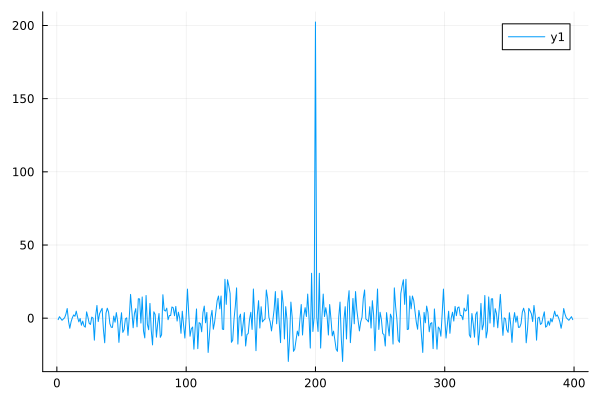

In [51]:
q = 5

u = x
d = y

c = DSP.xcorr(u, u)
plot(c)

In [52]:
Ruu = Toeplitz(c,c)

399×399 Toeplitz{Float64}:
 -0.992861   1.02456   -0.184484  …  -0.184484   1.02456   -0.992861
  1.02456   -0.992861   1.02456      -1.4407    -0.184484   1.02456
 -0.184484   1.02456   -0.992861     -0.552591  -1.4407    -0.184484
 -1.4407    -0.184484   1.02456       0.295477  -0.552591  -1.4407
 -0.552591  -1.4407    -0.184484      2.77791    0.295477  -0.552591
  0.295477  -0.552591  -1.4407    …   6.59722    2.77791    0.295477
  2.77791    0.295477  -0.552591     -1.96188    6.59722    2.77791
  6.59722    2.77791    0.295477     -6.89589   -1.96188    6.59722
 -1.96188    6.59722    2.77791      -2.41877   -6.89589   -1.96188
 -6.89589   -1.96188    6.59722       0.357006  -2.41877   -6.89589
 -2.41877   -6.89589   -1.96188   …   2.23396    0.357006  -2.41877
  0.357006  -2.41877   -6.89589       1.30181    2.23396    0.357006
  2.23396    0.357006  -2.41877       4.81287    1.30181    2.23396
  ⋮                               ⋱                        
  0.357006   2.23396    1

In [53]:
Rdu = DSP.xcorr(d, u) # (d, u, q)

399-element Vector{Float64}:
  -9.85803533594457
   3.1616367077232463
  -1.6731449186736063
 -15.469835418643116
 -12.678851638787055
  -8.960217235161085
  15.370957049786561
  79.16038044837866
  46.31214234168887
 -16.27448307924593
 -31.67545046748186
 -55.64734324034144
 -45.98996478885639
   ⋮
  55.56782139075267
  23.52791245473314
 -40.96126823618708
 -84.6095487837341
 -31.3441384566377
  34.813118380273266
  41.5036765331854
  31.689781266177416
  14.639896577941336
   2.9873554920414245
  10.407632763892225
   5.461788176607715

In [75]:
# ruu_inv = inv(Ruu)
w = inv(Ruu) * Rdu

LoadError: MethodError: no method matching ldiv!(::ToeplitzMatrices.ToeplitzFactorization{Float64, Toeplitz{Float64}, ComplexF64, FFTW.cFFTWPlan{ComplexF64, -1, true, 1, Tuple{Int64}}}, ::Matrix{Float64})

[0mClosest candidates are:
[0m  ldiv!([91m::Bidiagonal[39m, ::AbstractVecOrMat)
[0m[90m   @[39m [32mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.0+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mbidiag.jl:721[24m[39m
[0m  ldiv!([91m::UniformScaling[39m, ::AbstractVecOrMat)
[0m[90m   @[39m [32mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.0+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4muniformscaling.jl:307[24m[39m
[0m  ldiv!([91m::LinearAlgebra.QRCompactWY{T, M, C} where {M<:AbstractMatrix{T}, C<:AbstractMatrix{T}}[39m, ::AbstractMatrix{T}) where T
[0m[90m   @[39m [32mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.0+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mqr.jl:523[24m[39m
[0m  ...


In [73]:

# println("Estimated filter: ", w)
# println("True filter: ", htest)

# Minimum error
sigma2d = mean(d.^2)
mmse = sigma2d - dot(w, Rdu)
println("MMSE: ", mmse)


MMSE: 2.9946606574281297e9


In [35]:
using ToeplitzMatrices
r=zeros(5)
r[1:2]=[2.0,-1.0]
Toeplitz(r,r)

5×5 Toeplitz{Float64}:
  2.0  -1.0   0.0   0.0   0.0
 -1.0   2.0  -1.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0  -1.0   2.0  -1.0
  0.0   0.0   0.0  -1.0   2.0

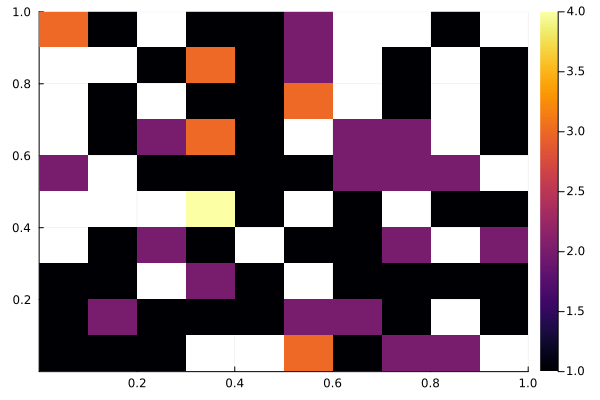

In [22]:
#  Univariate
h = fit(Histogram, rand(100))
h = fit(Histogram, rand(100), 0:0.1:1.0)
h = fit(Histogram, rand(100), nbins=10)
h = fit(Histogram, rand(100), weights(rand(100)), 0:0.1:1.0)
h = fit(Histogram, [20], 0:20:100)
h = fit(Histogram, [20], 0:20:100, closed=:left)
# Multivariate
h = fit(Histogram, (rand(100),rand(100)))
h = fit(Histogram, (rand(100),rand(100)),nbins=10)
plot(h)

In [76]:
using ToeplitzMatrices, LinearAlgebra

r = zeros(5)
r[1:2] .= [2.0, -1.0]

rr = Toeplitz(r, r)

# Use \ for solving linear systems
# inv_rr = rr \ I

# println("Inverse of Toeplitz matrix rr:\n", inv_rr)


LoadError: MethodError: no method matching ldiv!(::ToeplitzMatrices.ToeplitzFactorization{Float64, Toeplitz{Float64}, ComplexF64, FFTW.cFFTWPlan{ComplexF64, -1, true, 1, Tuple{Int64}}}, ::Matrix{Float64})

[0mClosest candidates are:
[0m  ldiv!([91m::Bidiagonal[39m, ::AbstractVecOrMat)
[0m[90m   @[39m [32mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.0+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mbidiag.jl:721[24m[39m
[0m  ldiv!([91m::UniformScaling[39m, ::AbstractVecOrMat)
[0m[90m   @[39m [32mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.0+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4muniformscaling.jl:307[24m[39m
[0m  ldiv!([91m::LinearAlgebra.QRCompactWY{T, M, C} where {M<:AbstractMatrix{T}, C<:AbstractMatrix{T}}[39m, ::AbstractMatrix{T}) where T
[0m[90m   @[39m [32mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.0+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mqr.jl:523[24m[39m
[0m  ...


In [65]:
transpose(rr) 

5×5 Toeplitz{Float64}:
  2.0  -1.0   0.0   0.0   0.0
 -1.0   2.0  -1.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0  -1.0   2.0  -1.0
  0.0   0.0   0.0  -1.0   2.0

In [78]:
using ToeplitzMatrices
using LinearAlgebra

# Define a Toeplitz matrix with non-zero determinant
r = [2.0, -1.0, 3.0]
T = Toeplitz(r, r)

# Check invertibility
if det(T) != 0
    println("The Toeplitz matrix is invertible.")
    # Compute the inverse using ldiv!
    T_inv = ldiv!(I, T)
    println("The inverse of the Toeplitz matrix:")
    println(T_inv)
else
    println("The Toeplitz matrix is singular and not invertible.")
end


The Toeplitz matrix is invertible.


LoadError: CanonicalIndexError: setindex! not defined for Toeplitz{Float64}

In [80]:
using ToeplitzMatrices
using LinearAlgebra

# Define a Toeplitz matrix with non-zero determinant
r = [2.0, -1.0, 3.0]
T = Toeplitz(r, r)

# Check invertibility
det(T)


-8.0

In [81]:
function toeplitz(x::AbstractVector{T}) where T
           n = length(x)
           A = zeros(T, n, n)
           for i = 1:n
               for j = 1:n-i+1
                   A[i,i+j-1] = x[j]
               end
               for j = n-i+2:n
                   A[i, j-(n-i+1)] = x[j]
               end
           end
           return A
       end

toeplitz (generic function with 1 method)

In [83]:
t = toeplitz(1:10)

10×10 Matrix{Int64}:
  1   2   3   4   5   6   7   8   9  10
 10   1   2   3   4   5   6   7   8   9
  9  10   1   2   3   4   5   6   7   8
  8   9  10   1   2   3   4   5   6   7
  7   8   9  10   1   2   3   4   5   6
  6   7   8   9  10   1   2   3   4   5
  5   6   7   8   9  10   1   2   3   4
  4   5   6   7   8   9  10   1   2   3
  3   4   5   6   7   8   9  10   1   2
  2   3   4   5   6   7   8   9  10   1

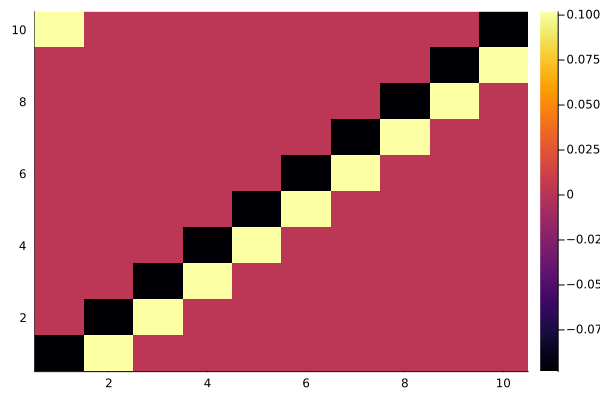

In [87]:
heatmap(inv(t))

# References
- [ ] [toeplitz matrix](https://discourse.julialang.org/t/toeplitz-matrix/22457/6)